In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
os.chdir('/mnt/c/Users/kneibm/Documents/OGGM/Snowslide/example')
df = pd.read_csv('global_snowslide/global_whypso/RGI11/binned_avalanche_statistics.csv', index_col=0)
# Sort columns in increasing order
int_list = (sorted(df.columns.astype(int)))
str_list = [str(x) for x in int_list]
df = df.reindex(str_list, axis=1)

In [3]:
dfh = pd.read_csv('global_snowslide/global_whypso/RGI11/binned_area.csv', index_col=0)
# Sort columns in increasing order
int_list = (sorted(dfh.columns.astype(int)))
str_list = [str(x) for x in int_list]
dfh = dfh.reindex(str_list, axis=1)

In [4]:
dfh

,1325,1375,1425,1475,1525,1575,1625,1675,1725,1775,...,4325,4375,4425,4475,4525,4575,4625,4675,4725,4775
rgi_id,,,,,,,,,,,,,,,,,,,,,
RGI60-11.00001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RGI60-11.00002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RGI60-11.00003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RGI60-11.00004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RGI60-11.00005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
RGI60-11.03923,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RGI60-11.03924,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RGI60-11.03925,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


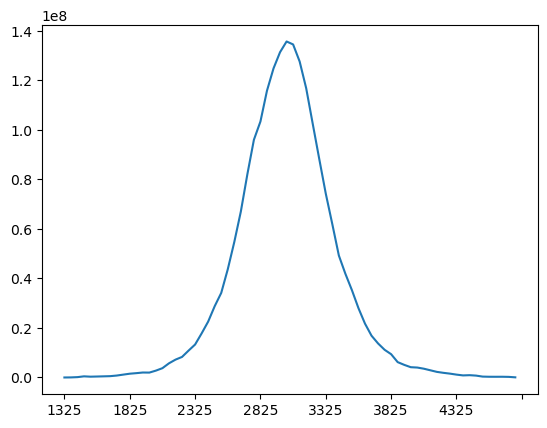

In [5]:
dfh.sum().plot();

In [7]:
wava = (df * dfh).sum() / dfh.sum()

In [8]:
wava.index = wava.index.astype(float)

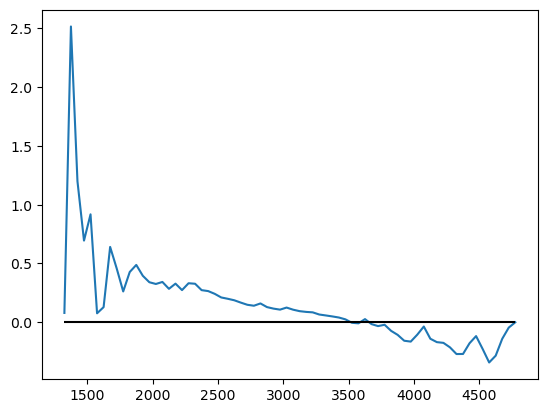

In [9]:
(wava - 1).plot();
plt.hlines(0, wava.index.min(), wava.index.max(), color='k');

In [10]:
#df.T

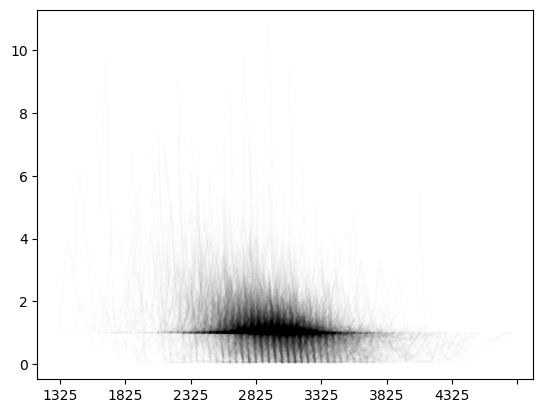

In [11]:
df.T.plot(color='k', alpha=0.01, legend=False);

In [12]:
dfh = dfh.fillna(1)

<Axes: >

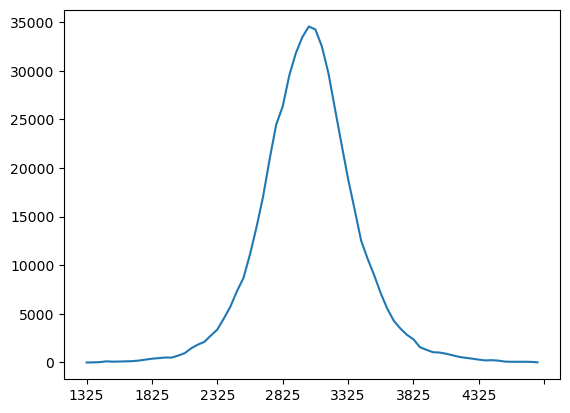

In [13]:
dfh.mean().plot()

In [25]:
df = pd.read_csv('global_snowslide/global_whypso/RGI11/snowslide_statistics.csv', index_col=0)
df2 = pd.read_csv('global_snowslide/global_whypso/RGI15/snowslide_statistics.csv', index_col=0)

(0.0, 2.0)

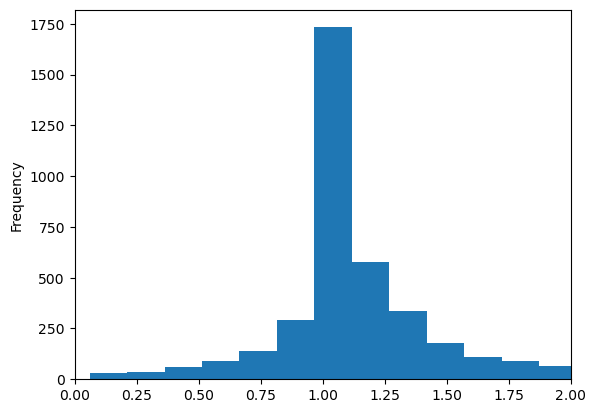

In [15]:
df.snowslide_1m_glacier_average.plot(kind='hist', bins=51);
plt.xlim(0,2)

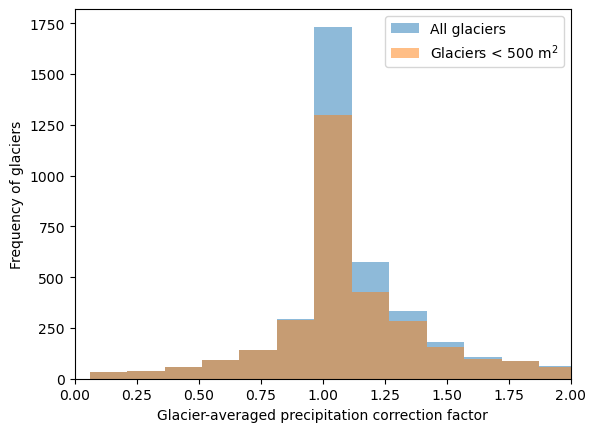

In [16]:
small_glaciers = df.loc[df.rgi_area_km2<0.5]

df.snowslide_1m_glacier_average.plot(kind='hist', bins=51, alpha = .5, label='All glaciers');
small_glaciers.snowslide_1m_glacier_average.plot(kind='hist', bins=51, alpha = .5, label='Glaciers < 500 m$^2$');

plt.xlim(0, 2)
#plt.xscale('log')
plt.xlabel('Glacier-averaged precipitation correction factor')
plt.ylabel('Frequency of glaciers')
plt.legend()

In [17]:
dfs = df[['rgi_area_km2', 'snowslide_1m_glacier_average']].dropna()

In [18]:
len(df), len(dfs)

(3927, 3925)

In [19]:
np.average(dfs.snowslide_1m_glacier_average, weights=dfs.rgi_area_km2)

1.1120077992067932

In [20]:
dfs.loc[dfs.snowslide_1m_glacier_average < 1].sort_values(by='rgi_area_km2')

,rgi_area_km2,snowslide_1m_glacier_average
rgi_id,,
RGI60-11.03770,0.010,0.628235
RGI60-11.01429,0.010,0.833876
RGI60-11.03323,0.010,0.926114
RGI60-11.01799,0.010,0.300095
RGI60-11.02759,0.011,0.916776
...,...,...
RGI60-11.00161,3.240,0.996576
RGI60-11.03667,3.462,0.999920
RGI60-11.02918,3.570,0.987827


(0.1, 10)

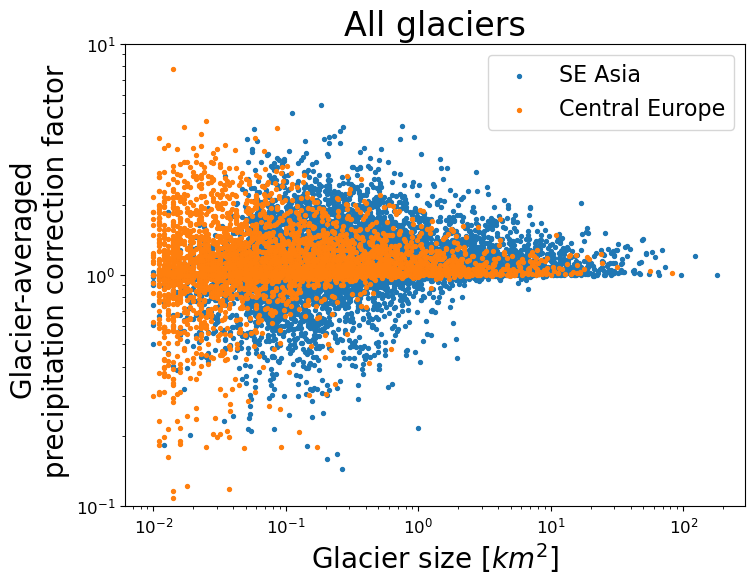

In [41]:
plt.figure(figsize=(8, 6))

plt.scatter(df2['rgi_area_km2'], df2['snowslide_1m_glacier_average'], label='SE Asia', s=8)
plt.scatter(df['rgi_area_km2'], df['snowslide_1m_glacier_average'], label='Central Europe', s=8)
plt.legend(fontsize=16)
plt.xscale('log')
plt.yscale('log')
plt.title('All glaciers', fontsize = 24)
plt.xlabel('Glacier size [$km^2$]', fontsize = 20)
plt.ylabel('Glacier-averaged \n precipitation correction factor', fontsize = 20)
plt.xticks(fontsize=12)  
plt.yticks(fontsize=12) 
plt.ylim(0.1, 10)

Compare different regions against one another

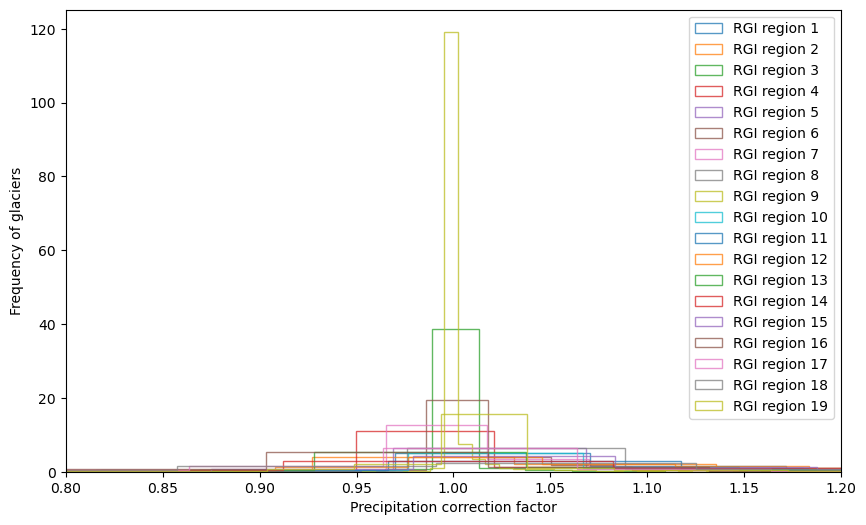

In [77]:
# Create an empty list to store the DataFrames
dataframes = []
regional_factor = []

for ii in range(1,20):
    rgi_region = str(ii).zfill(2)
    df = pd.read_csv('global_snowslide/global_whypso/RGI'+rgi_region+'/snowslide_statistics.csv', index_col=0)
    dfs = df[['rgi_area_km2', 'snowslide_1m_glacier_average']].dropna()
    dataframes.append(dfs)
    regional_factor.append([ii, np.average(dfs.snowslide_1m_glacier_average, weights=dfs.rgi_area_km2)])

# Plot histograms for each DataFrame on the same plot
plt.figure(figsize=(10, 6))

for ii, df in enumerate(dataframes):
    plt.hist(df['snowslide_1m_glacier_average'], bins = 51,
            density=True, 
            histtype='step', facecolor='g',
            alpha=0.75, label=f'RGI region {ii+1}')

plt.xlim(0.8, 1.2)
#plt.xscale('log')
plt.xlabel('Precipitation correction factor')
plt.ylabel('Frequency of glaciers')
plt.legend()
plt.show()

In [84]:
#regional_factor

# Use the indices to rearrange the original array
regional_factor_sorted = sorted(regional_factor, key=lambda x: x[1])

regional_factor_sorted

[[16, 0.9874280385075241],
 [9, 1.000256667093119],
 [3, 1.0006308813314866],
 [19, 1.0007901508217945],
 [6, 1.00134721294306],
 [7, 1.00461669924513],
 [17, 1.0083471772352504],
 [4, 1.0115019393834166],
 [5, 1.0235274867569388],
 [8, 1.0396420220683942],
 [1, 1.0446785367748705],
 [13, 1.0562837556931368],
 [2, 1.0667767805594],
 [10, 1.0702332818360758],
 [14, 1.097405933618221],
 [12, 1.1076219877429294],
 [11, 1.1120077992067932],
 [15, 1.131685621428308],
 [18, 1.1379281290195824]]

/home/kneibm/mambaforge/envs/oggm_env/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


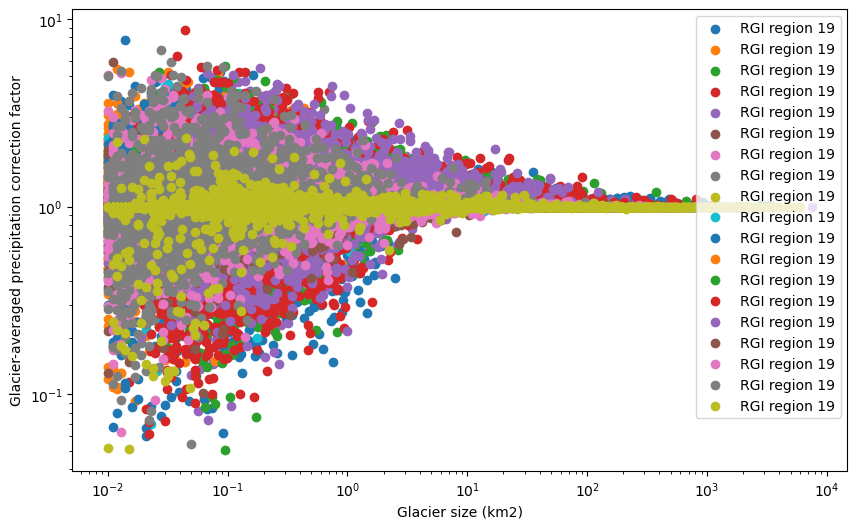

In [92]:
plt.figure(figsize=(10, 6))

for ii, df in enumerate(dataframes):
    plt.scatter(df['rgi_area_km2'], df['snowslide_1m_glacier_average'], label=f'RGI region {ii+1}')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Glacier size (km2)')
plt.ylabel('Glacier-averaged precipitation correction factor')
plt.legend()
plt.show()